In [3]:
# 1 - Import necessary libraries
import pandas as pd
import os
import random as rd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

In [193]:
print(os.name)
os.getcwd()

nt


'C:\\Users\\baris\\Desktop\\DATA 602\\Project\\Yahoo_fantasy_basketball_analyzer-master\\Yahoo_fantasy_basketball_analyzer-master\\yahoo_fantasy_basketball_analyzer\\machine_learning\\data\\2018\\player'

In [4]:
files = os.listdir('C:/Users/baris/Desktop/DATA 602/Project/Yahoo_fantasy_basketball_analyzer-master/Yahoo_fantasy_basketball_analyzer-master/yahoo_fantasy_basketball_analyzer/machine_learning/data/2018/player')
file_list = []
for element in files:
    if element.endswith(".csv"):
        file_list.append(element) 

len(file_list)

530

In [5]:
# choose a random player to analyze
x = rd.randint(0,530)
file_list[x]


'Grayson Allen.csv'

In [6]:
path = "C:/Users/baris/Desktop/DATA 602/Project/Yahoo_fantasy_basketball_analyzer-master/Yahoo_fantasy_basketball_analyzer-master/yahoo_fantasy_basketball_analyzer/machine_learning/data/2018/player"
df = pd.read_csv(path+"/"+str(file_list[x]), usecols=["MP", "FG%", "PTS", "FT%", "TRB", "AST", "STL", "BLK", "TOV"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      38 non-null     object 
 1   FG%     35 non-null     float64
 2   FT%     19 non-null     float64
 3   TRB     38 non-null     int64  
 4   AST     38 non-null     int64  
 5   STL     38 non-null     int64  
 6   BLK     38 non-null     int64  
 7   TOV     38 non-null     int64  
 8   PTS     38 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 2.8+ KB


In [7]:
# Putting zero(0) value for non-values
df = df.fillna(0)
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      38 non-null     object 
 1   FG%     38 non-null     float64
 2   FT%     38 non-null     float64
 3   TRB     38 non-null     int64  
 4   AST     38 non-null     int64  
 5   STL     38 non-null     int64  
 6   BLK     38 non-null     int64  
 7   TOV     38 non-null     int64  
 8   PTS     38 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 2.8+ KB


**Explanation of the abbreviations:**
- MP = Minutes Played
- FG% = Field Goal Percentage 
- FT% = Free Throw Percentage 
- TRB = Total Rebound 
- AST = Assist 
- STL = Steal 
- BLK = Block 
- TOV = Turnover
- PTS = Points

In [8]:
df.head()

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,10:31,1.000,1.0,0,0,0,0,0,7
1,4:12,0.000,0.0,0,0,0,0,0,0
2,5:20,0.333,1.0,1,0,0,0,1,4
3,12:56,1.000,1.0,1,0,0,0,1,11
4,8:05,0.000,0.0,0,2,0,0,0,0


In [9]:
df['MP'] = df['MP'].astype(str).str[0:2].str.replace(":","")
# df['MP'].str.split(":")[0][0]


In [10]:
# getting only minutes and removing seconds from MP(minutes played) column
# df['MP'] = df['MP'].astype(str).str[0:2]
df['MP'] = df['MP'].apply(int)
df['MP']

0     10
1      4
2      5
3     12
4      8
5     27
6      5
7     16
8     20
9      2
10     4
11     2
12    13
13    13
14     8
15     0
16     9
17    13
18    19
19    15
20    24
21     3
22     0
23    17
24     8
25     3
26     2
27     2
28    10
29     4
30     1
31     7
32     2
33    18
34    26
35    15
36    13
37    40
Name: MP, dtype: int64

In [11]:
# print(file_list[x])
df

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,10,1.000,1.000,0,0,0,0,0,7
1,4,0.000,0.000,0,0,0,0,0,0
2,5,0.333,1.000,1,0,0,0,1,4
3,12,1.000,1.000,1,0,0,0,1,11
4,8,0.000,0.000,0,2,0,0,0,0
5,27,0.375,0.500,0,1,0,0,0,9
6,5,0.000,0.000,0,0,0,0,0,0
7,16,0.375,0.333,0,0,0,0,0,9
8,20,0.222,0.000,0,1,0,0,4,5
9,2,0.000,0.000,0,0,0,0,0,0


In [12]:
df.head()

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,10,1.000,1.0,0,0,0,0,0,7
1,4,0.000,0.0,0,0,0,0,0,0
2,5,0.333,1.0,1,0,0,0,1,4
3,12,1.000,1.0,1,0,0,0,1,11
4,8,0.000,0.0,0,2,0,0,0,0


# Hypothesis 

H0: There is no difference in the accuracy or performance among the models selected

H1: There is a difference in the accuracy or performance among the models selected

## Linear Regression Model 

Coefficients: 
 [[0.39851943]]
Mean squared error: 42.23
Coefficient of determination: 0.52


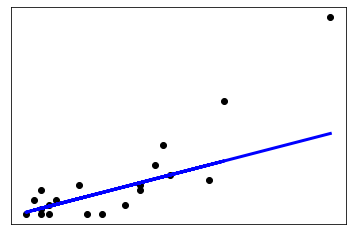

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# defining features
df_X = df[["MP"]].to_numpy()

# target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

# Plot outputs 
plt.scatter(df_X_test, df_y_test, color='black')
plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

For MP effect on PTS
Coefficients: 
 [[0.39851943]]
Mean squared error: 42.23
Coefficient of determination: 0.52


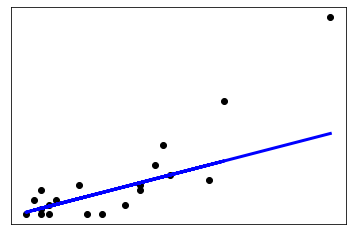

For FG% effect on PTS
Coefficients: 
 [[9.91475097]]
Mean squared error: 80.52
Coefficient of determination: 0.09


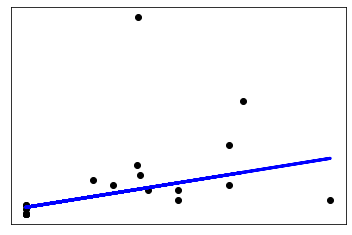

For PTS effect on PTS
Coefficients: 
 [[1.]]
Mean squared error: 0.00
Coefficient of determination: 1.00


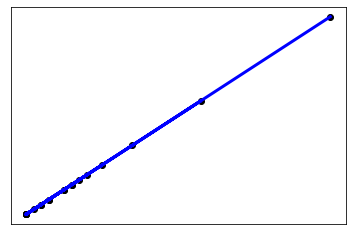

For FT% effect on PTS
Coefficients: 
 [[4.97337968]]
Mean squared error: 92.05
Coefficient of determination: -0.04


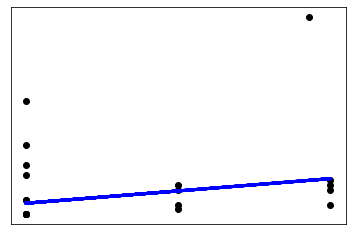

For TRB effect on PTS
Coefficients: 
 [[1.61111111]]
Mean squared error: 60.48
Coefficient of determination: 0.32


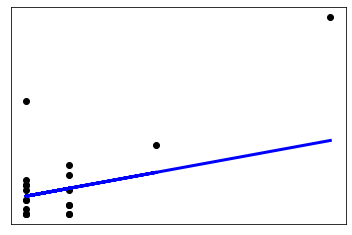

For AST effect on PTS
Coefficients: 
 [[0.2300885]]
Mean squared error: 91.13
Coefficient of determination: -0.03


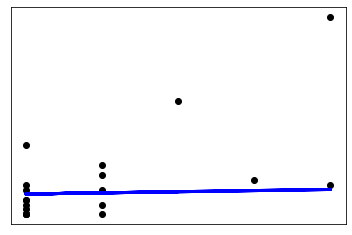

For STL effect on PTS
Coefficients: 
 [[-4.47058824]]
Mean squared error: 130.77
Coefficient of determination: -0.47


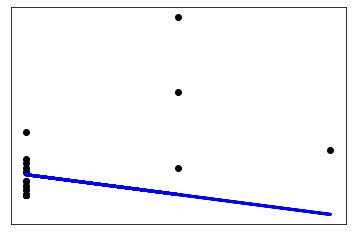

For BLK effect on PTS
Coefficients: 
 [[2.94117647]]
Mean squared error: 79.16
Coefficient of determination: 0.11


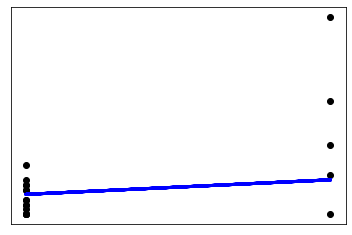

For TOV effect on PTS
Coefficients: 
 [[0.89419795]]
Mean squared error: 75.58
Coefficient of determination: 0.15


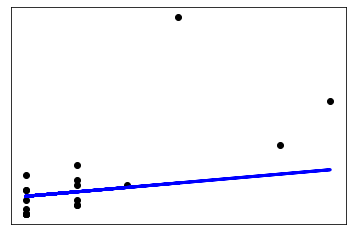

In [14]:
# Checking all features one by one with FOR loop 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

features = ["MP", "FG%", "PTS", "FT%", "TRB", "AST", "STL", "BLK", "TOV"]

for element in features: 
    print("For", element, "effect on PTS")
    # # defining features
    df_X = df[[element]].to_numpy()

    # # target variable
    df_y = df[['PTS']].to_numpy()

    # Split the data into training/testing sets
    df_X_train = df_X[:-20]
    df_X_test = df_X[-20:]

    # Split the targets into training/testing sets
    df_y_train = df_y[:-20]
    df_y_test = df_y[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(df_X_train, df_y_train)

    # Make predictions using the testing set
    df_y_pred = regr.predict(df_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)

    # The mean squared error
    print('Mean squared error: %.2f'
         % mean_squared_error(df_y_test, df_y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
         % r2_score(df_y_test, df_y_pred))

    # Plot outputs 
    plt.scatter(df_X_test, df_y_test, color='black')
    plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

In [15]:
# Adding more features to predict the target 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # defining features
df_X = df[["MP", "FG%", "AST", "TRB"]].to_numpy()

# # target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

df

Coefficients: 
 [[ 0.28848196  7.04347033 -0.47248398  0.76665039]]
Mean squared error: 36.22
Coefficient of determination: 0.59


,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,10,1.000,1.000,0,0,0,0,0,7
1,4,0.000,0.000,0,0,0,0,0,0
2,5,0.333,1.000,1,0,0,0,1,4
3,12,1.000,1.000,1,0,0,0,1,11
4,8,0.000,0.000,0,2,0,0,0,0
5,27,0.375,0.500,0,1,0,0,0,9
6,5,0.000,0.000,0,0,0,0,0,0
7,16,0.375,0.333,0,0,0,0,0,9
8,20,0.222,0.000,0,1,0,0,4,5
9,2,0.000,0.000,0,0,0,0,0,0


In [16]:
# Adding all the features to predict the target 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # defining features
df_X = df[["MP", "FG%", "FT%", "TRB", "AST", "STL", "BLK", "TOV"]].to_numpy()

# # target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

Coefficients: 
 [[ 0.31474653  8.51810379 -2.11954492  1.75202006 -0.5729071   0.11734277
  -0.23639614 -0.17034178]]
Mean squared error: 26.53
Coefficient of determination: 0.70


In [17]:
# Calculating R-squared score, mean absolute error, and mean squared error for linear regression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("For LINEAR REGRESSION MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, df_y_pred), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, df_y_pred), '\n',
      "R-squared score is:", r2_score(df_y_test, df_y_pred))


For LINEAR REGRESSION MODEL 
Mean absolute error is: 3.1471627558132296 
 Mean squared error is: 26.531974480465447 
 R-squared score is: 0.7011744391894642


Prediction: [9.54069583] vs. Actual: [8]
Prediction: [1.94636753] vs. Actual: [6]
Prediction: [4.85983381] vs. Actual: [7]
Prediction: [0.36774554] vs. Actual: [0]
Prediction: [1.175526] vs. Actual: [0]
Prediction: [9.11824353] vs. Actual: [10]
Prediction: [1.70508207] vs. Actual: [0]
Prediction: [0.31674426] vs. Actual: [2]
Prediction: [1.80501907] vs. Actual: [0]
Prediction: [2.19250599] vs. Actual: [5]
Prediction: [1.99806418] vs. Actual: [0]
Prediction: [4.77120219] vs. Actual: [3]
Prediction: [8.25635627] vs. Actual: [3]
Prediction: [6.07819267] vs. Actual: [6]
Prediction: [-1.00677345] vs. Actual: [1]
Prediction: [14.93847392] vs. Actual: [14]
Prediction: [11.40192368] vs. Actual: [23]
Prediction: [7.67128598] vs. Actual: [5]
Prediction: [2.97734425] vs. Actual: [2]
Prediction: [22.51288749] vs. Actual: [40]


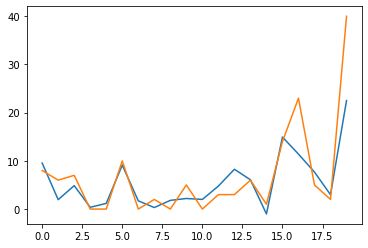

In [18]:
# Printing predicted and actual values

for i in range(len(df_y_test)):
    print("Prediction:", df_y_pred[i], "vs. Actual:", df_y_test[i])

plt.plot(df_y_pred)
plt.plot(df_y_test)

## Statsmodel for Linear Regression

In [19]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [20]:
mod = sm.OLS(df_y, df_X) #describe model
res = mod.fit() #fit model
print(res.summary()) #summarize model

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              44.25
Date:                Thu, 29 Apr 2021   Prob (F-statistic):                    1.60e-14
Time:                        15:06:55   Log-Likelihood:                         -90.024
No. Observations:                  38   AIC:                                      196.0
Df Residuals:                      30   BIC:                                      209.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
res.params

array([ 0.18966021,  5.94548499, -1.33239653,  2.56318135,  0.81541735,
        1.75456524,  1.22665477,  0.54147751])

In [22]:
print("R-squared:", res.rsquared)

R-squared: 0.9218827645792882


In [44]:
# Apply Rainbow test for linearity
sm.stats.linear_rainbow(res)

# first number is an F-statistic and that the second is the p-value

(11.830506097378827, 8.616813804629475e-05)

### P-value is 0.000086168 above cell. Check if it confirms the hypothesis.

## Lasso Model

In [25]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# summarize shape
print(df.shape)
# summarize first few lines
print(df.head())

(38, 9)
   MP    FG%  FT%  TRB  AST  STL  BLK  TOV  PTS
0  10  1.000  1.0    0    0    0    0    0    7
1   4  0.000  0.0    0    0    0    0    0    0
2   5  0.333  1.0    1    0    0    0    1    4
3  12  1.000  1.0    1    0    0    0    1   11
4   8  0.000  0.0    0    2    0    0    0    0


In [26]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 3.385 (2.221)


In [27]:
df.tail(10)

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
28,10,0.000,0.000,0,1,0,0,0,0
29,4,0.500,0.000,0,0,0,0,1,3
30,1,1.000,0.000,0,0,0,0,0,3
31,7,0.667,0.500,0,0,0,0,1,6
32,2,0.000,0.500,0,0,0,0,0,1
33,18,0.667,0.000,3,0,0,1,5,14
34,26,0.714,0.000,0,2,1,1,6,23
35,15,0.400,0.500,1,1,0,0,0,5
36,13,0.000,1.000,1,0,0,0,1,2
37,40,0.367,0.929,7,4,1,1,3,40


In [28]:
df_y_test[10:20]

array([[ 0],
       [ 3],
       [ 3],
       [ 6],
       [ 1],
       [14],
       [23],
       [ 5],
       [ 2],
       [40]], dtype=int64)

In [32]:
#define model 
model = Lasso(alpha=1.0)

#fit model
model.fit(X, y)

# define new data 
yhat = model.predict(df_X_test)
yhat

array([10.04977596,  7.52197542, 11.59814334,  0.25993149,  0.28733545,
        9.57029666,  2.82899478,  2.37691944,  1.31496077, -0.25388117,
        3.8566201 ,  1.32189016, -0.76769383,  2.86332814, -0.25388117,
       15.41437726, 15.36649874,  7.99452533,  7.51504603, 31.89733146])

In [34]:
print("For LASSO MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, yhat))

For LASSO MODEL 
Mean absolute error is: 2.913735818482688 
 Mean squared error is: 13.703816285854652 
 R-squared score is: 0.8456560181798716


## Ridge Regression Model

In [36]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.056 (2.463)


In [39]:
data = df.values
X, y = data[:, :-1], data[:, -1]
#define model 
model = Ridge(alpha=1.0)

#fit model
model.fit(X, y)

# define new data 
ridge_yhat = model.predict(df_X_test)
ridge_yhat

array([ 9.68673889,  8.87201861,  8.74531683, -1.04973897,  0.27605001,
       12.24688369,  1.45240494,  2.28608351,  0.93650719,  1.12083238,
        1.62873783,  2.51949683,  3.40571866,  4.33596164, -1.40854629,
       18.52167926, 17.59274894,  7.61414272,  5.19291402, 35.29355465])

In [40]:
print("For RIDGE MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, ridge_yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, ridge_yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, ridge_yhat))

For RIDGE MODEL 
Mean absolute error is: 2.173044348529877 
 Mean squared error is: 6.948203834544964 
 R-squared score is: 0.9217434454788684


# - Set your confidence level, say 95%, and see if the p value is > 0.05 (accept H0) or lower (accept H1).
## Random Forest Model

In [156]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.23.1


- The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

In [41]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

data = df.values
X, y = data[:, :-1], data[:, -1]
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 3.088 (2.952)


In [42]:
# Making predictions
# fit the model on the whole dataset
model.fit(X, y)

# putting new row from test dataset
random_yhat = model.predict(df_X_test)
random_yhat

array([ 8.23,  7.91,  8.79,  0.03,  0.04,  9.43,  0.08,  1.5 ,  0.04,
        4.67,  0.83,  3.69,  3.93,  5.27,  1.09, 12.61, 18.08,  6.65,
        2.4 , 29.92])

In [43]:
print("For RANDOM FOREST MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, random_yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, random_yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, random_yhat))

For RANDOM FOREST MODEL 
Mean absolute error is: 1.3615 
 Mean squared error is: 7.039885 
 R-squared score is: 0.9207108545684922
